# PROBLEM STATEMENT
<b> DOMAIN: Insurance Claim Prediction </b>


<b> OBJECTIVE : To train a Linear Regression Model for accurate Claim Prediction 


**CONTEXT** A key challenge for the insurance industry is to charge each customer an appropriate
premium for the risk they represent. The ability to predict a correct claim amount has a
significant impact on insurer's management decisions and financial statements.
Predicting the cost of claims in an insurance company is a real-life problem that needs
to be solved in a more accurate and automated way. Several factors determine the
cost of claims based on health factors like BMI, age, smoker, health conditions and
others. Insurance companies apply numerous techniques for analyzing and predicting
health insurance costs. 

**LEARNING OUTCOME**

Linear Regression ,
Exploratory Data Analysis ,
Descriptive Statistics ,
Log Transformations ,
Dealing with categorical data 

* IMPORTING NECCESARY LIBRARIES 

In [ ]:
# Load the necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline 
import datetime 
from pandas_profiling import ProfileReport
import io  

In [ ]:
# To determine the versions of the packages
print(np.__version__)
print(pd.__version__)
print(sns.__version__)  

1.19.5
1.1.5
0.11.1


# DATA OVERVIEW 

In [ ]:
#To upload the CSV file
from google.colab import files 


uploaded = files.upload() 

Saving healthinsurance.csv to healthinsurance (10).csv


In [ ]:
df = pd.read_csv(io.BytesIO(uploaded['healthinsurance.csv'])) 

In [ ]:
# Check number of rows and columns
df.shape  

(1338, 10)

In [ ]:
print('The no. of rows is' ,df.shape[0], 'The no. of columns is', df.shape[1])  

The no. of rows is 1338 The no. of columns is 10


In [ ]:
df.columns 

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'bloodpressure',
       'diabetes', 'regular_ex', 'claim'],
      dtype='object')

In [ ]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            1338 non-null   int64  
 1   sex            1338 non-null   object 
 2   bmi            1338 non-null   float64
 3   children       1338 non-null   int64  
 4   smoker         1338 non-null   int64  
 5   region         1338 non-null   object 
 6   bloodpressure  1338 non-null   int64  
 7   diabetes       1338 non-null   int64  
 8   regular_ex     1338 non-null   int64  
 9   claim          1338 non-null   float64
dtypes: float64(2), int64(6), object(2)
memory usage: 104.7+ KB


In [ ]:
df.dtypes 

age                int64
sex               object
bmi              float64
children           int64
smoker             int64
region            object
bloodpressure      int64
diabetes           int64
regular_ex         int64
claim            float64
dtype: object

In [ ]:
df.head(5) 

,age,sex,bmi,children,smoker,region,bloodpressure,diabetes,regular_ex,claim
0,54,female,47.4,0,0,southeast,90,1,0,63770.43
1,45,male,57.0,0,0,southeast,66,1,0,62592.87
2,52,male,34.5,3,0,northwest,70,0,0,60021.40
3,31,female,38.1,1,0,northeast,80,1,0,58571.07
4,33,female,59.0,0,0,northwest,50,1,0,55135.40


In [ ]:
df.describe().T  

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.00,27.0000,39.00,51.000,64.00
bmi,1338.0,30.808281,6.282207,16.00,26.3000,30.50,34.800,62.00
children,1338.0,1.094918,1.205493,0.00,0.0000,1.00,2.000,5.00
smoker,1338.0,0.144245,0.351469,0.00,0.0000,0.00,0.000,1.00
bloodpressure,1338.0,68.977578,19.327770,0.00,64.0000,72.00,80.000,122.00
diabetes,1338.0,0.687593,0.463648,0.00,0.0000,1.00,1.000,1.00
regular_ex,1338.0,0.319133,0.466315,0.00,0.0000,0.00,1.000,1.00
claim,1338.0,13270.422414,12110.011240,1121.87,4740.2875,9382.03,16639.915,63770.43


In [ ]:
df.isnull().sum() 

age              0
sex              0
bmi              0
children         0
smoker           0
region           0
bloodpressure    0
diabetes         0
regular_ex       0
claim            0
dtype: int64

In [ ]:
df.corr() 

,age,bmi,children,smoker,bloodpressure,diabetes,regular_ex,claim
age,1.000000,0.104088,0.042469,-0.083752,-0.018778,0.064129,0.008973,0.299008
bmi,0.104088,1.000000,0.022702,-0.016571,0.019526,0.083368,-0.066675,0.229282
children,0.042469,0.022702,1.000000,-0.018216,0.016912,0.067813,-0.018002,0.067998
smoker,-0.083752,-0.016571,-0.018216,1.000000,-0.010093,0.070198,-0.034649,0.560278
bloodpressure,-0.018778,0.019526,0.016912,-0.010093,1.000000,-0.015722,0.038387,0.003688
diabetes,0.064129,0.083368,0.067813,0.070198,-0.015722,1.000000,-0.019381,0.188871
regular_ex,0.008973,-0.066675,-0.018002,-0.034649,0.038387,-0.019381,1.000000,-0.104278
claim,0.299008,0.229282,0.067998,0.560278,0.003688,0.188871,-0.104278,1.000000


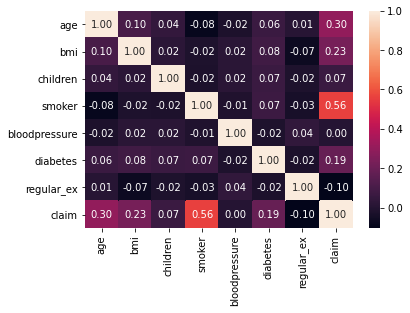

In [ ]:
sns.heatmap(df.corr(),annot=True,fmt=".2f") 

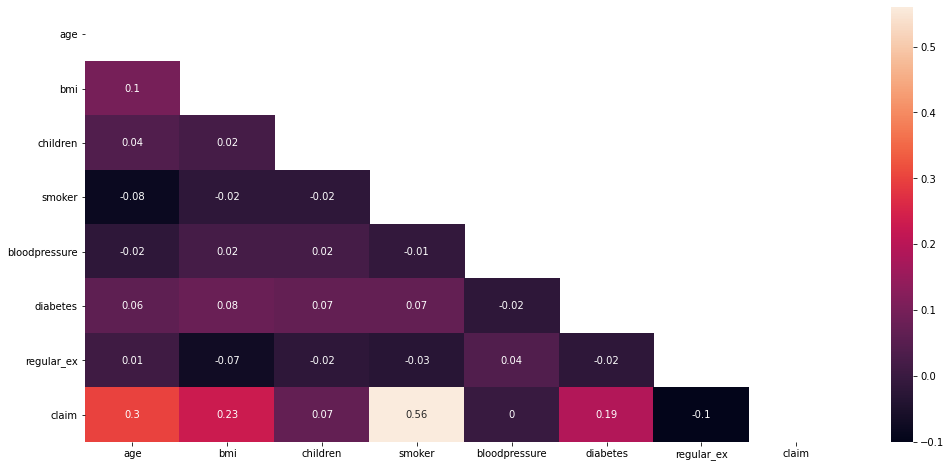

In [ ]:
fig_dims = (17, 8)
fig = plt.subplots(figsize=fig_dims)
mask = np.triu(np.ones_like(df.corr(), dtype=np.bool)) 
sns.heatmap(round(df.corr(),2), annot=True, mask=mask) 

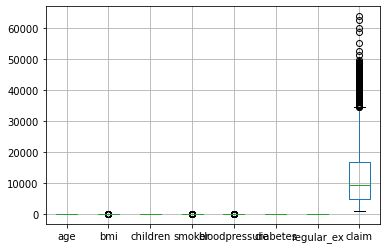

In [ ]:
df.boxplot() 

In [ ]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [ ]:
lr1,ur1=remove_outlier(df['claim'])
print("lower range",lr1, "and upper range", ur1)

lower range -13109.15375 and upper range 34489.35625


In [ ]:
df['claim']=np.where(df['claim']>ur1,ur1,df['claim'])
df['claim']=np.where(df['claim']<lr1,lr1,df['claim'])

In [ ]:
lr2,ur2=remove_outlier(df['bloodpressure'])
print("lower range",lr2, "and upper range", ur2)

lower range 40.0 and upper range 104.0


In [ ]:
df['bloodpressure']=np.where(df['bloodpressure']>ur2,ur2,df['bloodpressure'])
df['bloodpressure']=np.where(df['bloodpressure']<lr2,lr2,df['bloodpressure'])

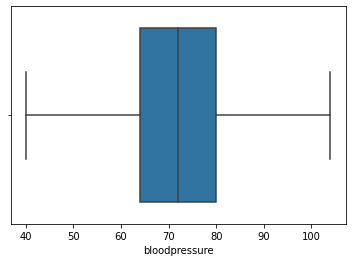

In [ ]:
sns.boxplot(x=df['bloodpressure']);

In [ ]:
lr3,ur3=remove_outlier(df['bmi'])
print("lower range",lr3, "and upper range", ur3)

lower range 13.550000000000006 and upper range 47.54999999999999


In [ ]:
df['bmi']=np.where(df['bmi']>ur3,ur3,df['bmi'])
df['bmi']=np.where(df['bmi']<lr3,lr3,df['bmi'])

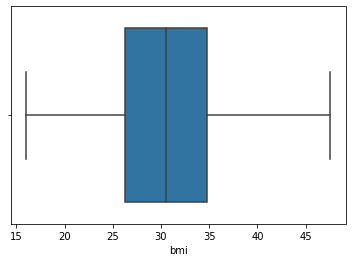

In [ ]:
sns.boxplot(x=df['bmi']);

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


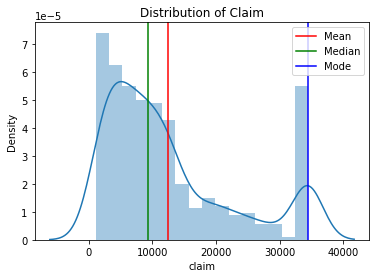

In [ ]:
claim_mean = df['claim'].mean()
claim_median = df['claim'].median()
claim_mode = df['claim'].mode()

ax_hist = sns.distplot(df['claim'], kde=True)

ax_hist.axvline(claim_mean, color='r', label='Mean')
ax_hist.axvline(claim_median, color='g', label='Median')
ax_hist.axvline(claim_mode[0], color='b', label='Mode')
ax_hist.set_title('Distribution of Claim')

plt.legend(); plt.show();

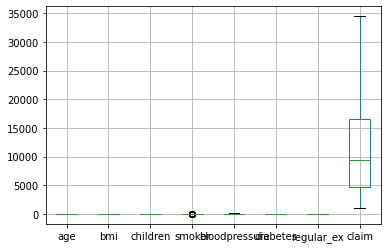

In [ ]:
df.boxplot() 

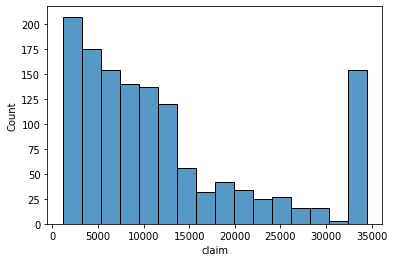

In [ ]:
sns.histplot(df['claim'] , y=None) 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


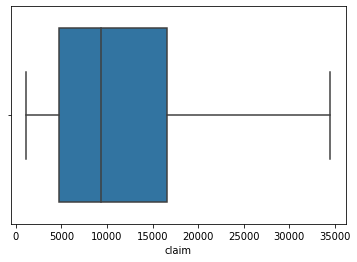

In [ ]:
sns.boxplot(df['claim']) 

# Data Preparation - Transformation & Encoding 

**TRANSFORMATION OF COLUMN CLAIM Using Log Transformation** 

**Transform the column “claim” using log transformation
and append the transformed column to the dataframe under the column name
“log_claim” - optionally you can check the effect of the transformation by plotting
histogram of “claim” before and after transformation. ** 

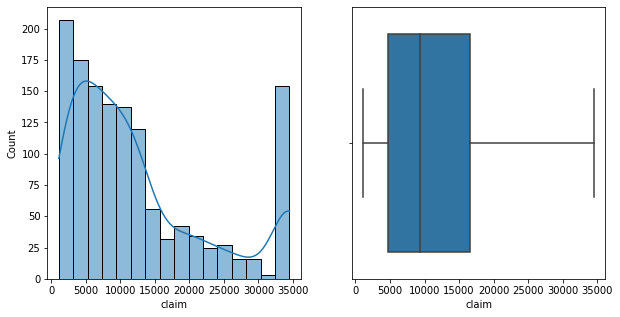

In [ ]:
#Before Tranformation  histogram of “claim”
fig_dims = (10, 5) 
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=fig_dims) 
sns.histplot(df['claim'], kde=True, ax = axs[0])
sns.boxplot(x= df['claim'], ax = axs[1])
plt.show()  

In [ ]:
#Transformation using Log transformation
df.claim.describe() 

count     1338.000000
mean     12479.369954
std      10158.057297
min       1121.870000
25%       4740.287500
50%       9382.030000
75%      16639.915000
max      34489.356250
Name: claim, dtype: float64

-0.2236920483663701
-0.7191236383106188


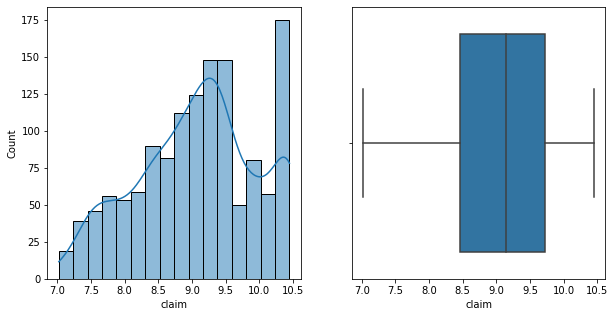

In [ ]:
# Using log transformation
print(np.log(df['claim']).skew())
print(np.log(df['claim']).kurtosis())

fig_dims = (10, 5) 
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=fig_dims) 
sns.histplot(np.log(df['claim']), kde=True, ax = axs[0])
sns.boxplot(x= np.log(df['claim']), ax = axs[1])
plt.show() 

In [ ]:
log_claim = np.log(df['claim'])
df['log_claim'] = log_claim

In [ ]:
df.head(5) 

,age,sex,bmi,children,smoker,region,bloodpressure,diabetes,regular_ex,claim,log_claim
0,54,female,47.40,0,0,southeast,90.0,1,0,34489.35625,10.448406
1,45,male,47.55,0,0,southeast,66.0,1,0,34489.35625,10.448406
2,52,male,34.50,3,0,northwest,70.0,0,0,34489.35625,10.448406
3,31,female,38.10,1,0,northeast,80.0,1,0,34489.35625,10.448406
4,33,female,47.55,0,0,northwest,50.0,1,0,34489.35625,10.448406


## Encoding 

**Encode the categorical variables. In case a column has more than 2 categories,
use one-hot encoding.** 

In [ ]:
cat=[]
num=[]
for i in df.columns:
    if df[i].dtype=="object":
        cat.append(i)
    else:
        num.append(i)
print(cat) 
print(num)


['sex', 'region']
['age', 'bmi', 'children', 'smoker', 'bloodpressure', 'diabetes', 'regular_ex', 'claim', 'log_claim']


In [ ]:
df[cat] 

,sex,region
0,female,southeast
1,male,southeast
2,male,northwest
3,female,northeast
4,female,northwest
...,...,...
1333,male,southeast
1334,male,southeast
1335,male,southeast
1336,male,southeast


In [ ]:
df['region'].unique() 

array(['southeast', 'northwest', 'northeast', 'southwest'], dtype=object)

In [ ]:
df['sex'].unique()

array(['female', 'male'], dtype=object)

### Sex Column has only 2 unique values, hence we will do label encoding for it
### Region has 4 uniques values and hence one-hot encoding will be applied 

In [ ]:
# convert sex column to a category, then use those category values for your label encoding:
df["sex"] =df["sex"].astype('category')
df.dtypes 

age                 int64
sex              category
bmi               float64
children            int64
smoker              int64
region             object
bloodpressure     float64
diabetes            int64
regular_ex          int64
claim             float64
log_claim         float64
dtype: object

In [ ]:
df["sex"].value_counts() 

male      676
female    662
Name: sex, dtype: int64

In [ ]:
df["sex"] = df["sex"].cat.codes
df["sex"].head() 

0    0
1    1
2    1
3    0
4    0
Name: sex, dtype: int8

In [ ]:
df["sex"].value_counts() 

1    676
0    662
Name: sex, dtype: int64

In [ ]:
# Male is encoded as 1 and Female is encoded as 0 

#### One- hot encoding for region column 

In [ ]:
cat.remove('region')  

In [ ]:
pd.get_dummies(df, columns=['region']).head(5) 

,age,sex,bmi,children,smoker,bloodpressure,diabetes,regular_ex,claim,log_claim,region_northeast,region_northwest,region_southeast,region_southwest
0,54,0,47.40,0,0,90.0,1,0,34489.35625,10.448406,0,0,1,0
1,45,1,47.55,0,0,66.0,1,0,34489.35625,10.448406,0,0,1,0
2,52,1,34.50,3,0,70.0,0,0,34489.35625,10.448406,0,1,0,0
3,31,0,38.10,1,0,80.0,1,0,34489.35625,10.448406,1,0,0,0
4,33,0,47.55,0,0,50.0,1,0,34489.35625,10.448406,0,1,0,0


In [ ]:
df.columns 

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'bloodpressure',
       'diabetes', 'regular_ex', 'claim', 'log_claim'],
      dtype='object')

In [ ]:
df=   pd.get_dummies(df, columns=['region'],drop_first=True) 

In [ ]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'bloodpressure', 'diabetes',
       'regular_ex', 'claim', 'log_claim', 'region_northwest',
       'region_southeast', 'region_southwest'],
      dtype='object')

## Separate out the dependent variable(“claim”) from the independent 

#### To exclude claim and log_claim from the rest of the variable 

In [ ]:
# Here we will assign the dependent variable “claim” to y variable while the rest independent variables excluding “claim” and “log_claim” will be assign to X variable. 
# independant variables
X = df.drop(['claim','log_claim'], axis=1)
# the dependent variable
y = df[['claim']]


print(X.head())
print(y.head()) 

   age  sex    bmi  ...  region_northwest  region_southeast  region_southwest
0   54    0  47.40  ...                 0                 1                 0
1   45    1  47.55  ...                 0                 1                 0
2   52    1  34.50  ...                 1                 0                 0
3   31    0  38.10  ...                 0                 0                 0
4   33    0  47.55  ...                 1                 0                 0

[5 rows x 11 columns]
         claim
0  34489.35625
1  34489.35625
2  34489.35625
3  34489.35625
4  34489.35625


In [ ]:
print(X.shape)
print(y.shape) 

(1338, 11)
(1338, 1)


## Split Data 

In [ ]:
# Split X and y into training and test set in 70:30 ratio
# Sklearn package's randomized data splitting function

from sklearn.model_selection import train_test_split # Sklearn package's randomized data splitting function

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)  

## Fit Linear Regression Model 

** Train a linear regression model using the training data and print the r_squared
value of the prediction on the test data. ** 

In [ ]:
from sklearn.linear_model import LinearRegression
linearregression = LinearRegression()                                    
linearregression.fit(X_train, y_train)                                  

print("Intercept of the linear equation:", linearregression.intercept_) 
print("\nCo-efficients of the equation are:", linearregression.coef_)

from sklearn.metrics import mean_absolute_error, mean_squared_error,  r2_score

pred = linearregression.predict(X_test) 

Intercept of the linear equation: [-10108.37540716]

Co-efficients of the equation are: [[  270.27307815   147.28840366   216.41327193   556.86194747
  18633.30117893    22.93608877  1724.45448609 -1404.91094508
   -410.10295778  -653.11241984  -823.02985796]]


In [ ]:
# R2 Squared:
r2_score(y_test, pred) 

0.51899739438433

In [ ]:
# Training Score
linearregression.score(X_train, y_train) 

0.5696961798228741

In [ ]:
# Testing score
linearregression.score(X_test, y_test) 

0.51899739438433

 ## Scatter plot between the actual values and the predicted values for the test set 

In [ ]:
y_test.shape 

(402, 1)

In [ ]:
y_pred = list(pred)  

In [ ]:
y_pred 

[array([13939.33849377]),
 array([5350.21258475]),
 array([10035.1740331]),
 array([17019.94666256]),
 array([9493.06249155]),
 array([4112.67947157]),
 array([12052.98907031]),
 array([14769.86042084]),
 array([11412.32785294]),
 array([10922.48697748]),
 array([16121.97266087]),
 array([15552.5710767]),
 array([4610.58161089]),
 array([10549.41077811]),
 array([30611.96647356]),
 array([10223.11524973]),
 array([10631.63921133]),
 array([10452.78613212]),
 array([14444.21651967]),
 array([12328.98046767]),
 array([25020.96118599]),
 array([8857.6820769]),
 array([31475.80988802]),
 array([6506.64779889]),
 array([14954.33019764]),
 array([10304.17560174]),
 array([9211.71376333]),
 array([3225.04584377]),
 array([14566.44277351]),
 array([28630.56701766]),
 array([11492.81119686]),
 array([10639.34325041]),
 array([7937.52157754]),
 array([14493.07766108]),
 array([7158.77259279]),
 array([12893.29445437]),
 array([16668.20063547]),
 array([16055.08754516]),
 array([16976.45339119]),

In [ ]:
len(y_pred) 

402

In [ ]:

y_test 

,claim
559,11085.59000
1087,3761.29000
1020,4536.26000
460,12574.05000
802,7371.77000
...,...
323,17361.77000
1268,1815.88000
134,34489.35625
1274,1737.38000


In [ ]:

df_new= pd.DataFrame(y_pred) 

In [ ]:
df_new['y_test'] = y_test 

In [ ]:
df_new.head(5) 

,0,y_test
0,13939.338494,NaN
1,5350.212585,NaN
2,10035.174033,NaN
3,17019.946663,34489.35625
4,9493.062492,NaN


In [ ]:
df_new.columns =['Predicted','Actual']  

In [ ]:
df_new.head(5) 

,Predicted,Actual
0,13939.338494,NaN
1,5350.212585,NaN
2,10035.174033,NaN
3,17019.946663,34489.35625
4,9493.062492,NaN


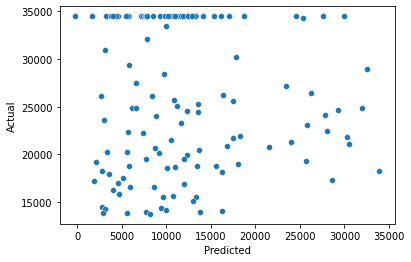

In [ ]:
sns.scatterplot(x=df_new['Predicted'] , y=df_new['Actual']) 

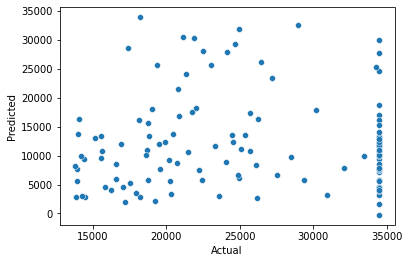

In [ ]:
sns.scatterplot(x= df_new['Actual']  , y=df_new['Predicted']) 

### Performance of the Model

The model is skewed and not in normal distribution. The mean and median is not equivalent. This gives very less accuracy with 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


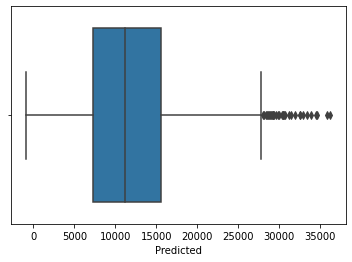

In [ ]:
sns.boxplot(df_new['Predicted']) 

## Test and Train model with Log_Claim as Depedent Variable

split the data but the dependent variable will be “log_claim” and rest as the independent variables excluding the “claim” and “log_claim” 

In [ ]:
# Here we will assign the dependent variable “claim” to y variable while the rest independent variables excluding “claim” and “log_claim” will be assign to X variable. 
# independant variables
X = df.drop(['claim','log_claim'], axis=1)
# the dependent variable
y = df[['log_claim']] 

## Split Data 

In [ ]:
# Split X and y into training and test set in 70:30 ratio
# Sklearn package's randomized data splitting function

from sklearn.model_selection import train_test_split # Sklearn package's randomized data splitting function

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)  

## Fit Linear Regression Model 

In [ ]:
from sklearn.linear_model import LinearRegression
linearregression = LinearRegression()                                    
linearregression.fit(X_train, y_train)                                  

print("Intercept of the linear equation:", linearregression.intercept_) 
print("\nCo-efficients of the equation are:", linearregression.coef_)

from sklearn.metrics import mean_absolute_error, mean_squared_error,  r2_score

pred = linearregression.predict(X_test)  

Intercept of the linear equation: [6.93663231]

Co-efficients of the equation are: [[ 3.69243154e-02 -5.78012367e-02  1.14363585e-02  1.12172173e-01
   1.45244061e+00  7.79024098e-04  1.11391354e-01 -5.92767250e-02
  -6.45117868e-02 -1.38298930e-01 -1.26619308e-01]]


In [ ]:
# R2 Squared:
r2_score(y_test, pred)  

0.5808599198304663

In [ ]:
# Training Score
linearregression.score(X_train, y_train) 

0.6696296607300276

In [ ]:
# Testing score
linearregression.score(X_test, y_test)

0.5808599198304663

In [ ]:
y_test.shape

(402, 1)

In [ ]:
y_pred = list(pred) 

In [ ]:
df_new= pd.DataFrame(y_pred) 
df_new['y_test'] = y_test 
df_new.columns =['Predicted','Actual'] 
df_new.head(5) 

,Predicted,Actual
0,9.537463,NaN
1,8.341996,NaN
2,8.671194,NaN
3,9.607579,10.448406
4,8.967798,NaN


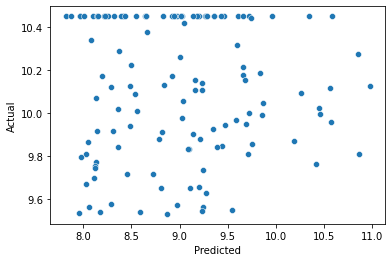

In [ ]:
sns.scatterplot(x=df_new['Predicted'] , y=df_new['Actual']) 

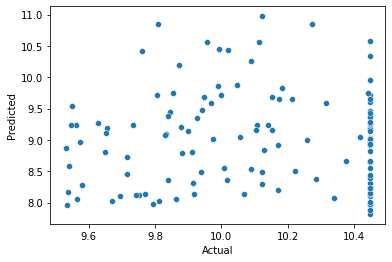

In [ ]:
sns.scatterplot(x= df_new['Actual']  , y=df_new['Predicted'])